Задача 1:
Постройте линейную регрессионную модель, позволяющую предсказывать объем продаж в регионе в зависимости от расходов на рекламу. Напишите уравнение регресссии.
Задача 2:
Дайте графическую интерпритацию, полученных результатов (отобразите на одном графике уравнение регрессии и наблюдения, представленные в наборе данных)
Задача 3:
Предскажите объем продаж при расходах на рекламу в 121 тыс. руб.
Задача 4:
Сделайте вывод о статистической значимости коэффициентов линейной регрессии

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 50)
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import scipy.stats as sts
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#Заводим некоторые функции

def log_or_standard_scaler(X_train, X_test, y_train, y_test, mod):
    dataframes = [X_train, X_test, y_train, y_test]
    _ = None
    if mod == 'nothing':
        return dataframes, _
    if mod == 'log':
        transformed_dataframes = []
        for dataframe in dataframes:
            dataframe = np.log(dataframe)
            transformed_dataframes.append(dataframe)
        return transformed_dataframes, _
    if mod == 'std_log':
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        y_train = np.log(y_train)
        y_test = np.log(y_test)
        transformed_dataframes = [X_train, X_test, y_train, y_test]
        return transformed_dataframes, scaler
    else:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        transformed_dataframes = [X_train, X_test, y_train, y_test]
        return transformed_dataframes, scaler

def fit(list_of_dfs):
    X_train, X_test, y_train, y_test = list_of_dfs
    lr = LinearRegression().fit(X_train, y_train) 
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    print('R^2 train:', lr.score(X_train, y_train))
    print('R^2 train:', lr.score(X_test, y_test))
    print('mape train', mape(y_train, y_train_pred))
    print('mape test', mape(y_test, y_test_pred))
    print('intercept =', lr.intercept_, 'coeficient =', lr.coef_)
    return lr, lr.intercept_, lr.coef_, y_train_pred, y_test_pred

def plot_res(list_of_dfs, y_train_pred, y_test_pred):
    fig, ax =plt.subplots(1,2, figsize=(10,5))
    X_train, X_test, y_train, y_test = list_of_dfs
    sns.scatterplot(x=X_train.flatten(), y=y_train, ax =ax[0])
    sns.scatterplot(x=X_train.flatten(), y=y_train_pred, ax =ax[0])
    fig.suptitle('train                                                   test');
    fig.show()
    sns.scatterplot(x=X_test.flatten(), y=y_test, ax =ax[1])
    sns.scatterplot(x=X_test.flatten(), y=y_test_pred, ax =ax[1])
    plt.show()
    
def model_summary(model, X, y, columns):
    params = np.append(model.intercept_, model.coef_)
    predictions = model.predict(X)
    new = pd.DataFrame({'Constant': np.ones(len(X))})
    new = new.join(pd.DataFrame(X))
    mse = (sum((y - predictions) ** 2)) / (len(new) - len(new.columns))
    var_b = mse * (np.linalg.inv(np.dot(new.T, new)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params / sd_b
    p_values = [2 * (1 - stats.t.cdf(np.abs(i), (len(new) - 1))) for i in ts_b]
    sd_b = np.round(sd_b, 3)
    ts_b = np.round(ts_b, 3)
    p_values = np.round(p_values, 3)
    params = np.round(params, 3)
    fin = pd.DataFrame()
    fin['Коэфициент'], fin['Стандартная ошибка'], fin['t критерий'], fin['P_value'] = params, sd_b, ts_b, p_values
    fin.index = ['Intercept'] + list(columns)
    print(fin)

def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def plot(df):
    sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1])
    plt.show();
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    for i, ax in enumerate(axes.flatten()):
        sns.boxplot(y= df.iloc[:, i],  orient='v' , ax=ax)
    fig.tight_layout()
    plt.show();
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    for i, ax in enumerate(axes.flatten()):
        sns.distplot(df.iloc[:, i] , ax=ax)
    fig.tight_layout()
    plt.show();
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    for i, ax in enumerate(axes.flatten()):
        sns.lineplot(x= sorted(df.iloc[:, i]), y=sorted(df.index) , ax=ax )
        ax.set(xlabel= df.columns[i], ylabel='Индекс')
    fig.tight_layout();

In [3]:
# прочитаем данные
df = pd.read_excel('Тестовое задание по моделям.xlsx', sheet_name='Задание 2')
df = df.iloc[:,0:2]

### Задача 0. Анализ данных

In [4]:
df.head()

,"Затраты на рекламу, тыс. руб.","Объем продаж, тыс. шт."
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [5]:
df.describe()

,"Затраты на рекламу, тыс. руб.","Объем продаж, тыс. шт."
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [6]:
df.corr()

,"Затраты на рекламу, тыс. руб.","Объем продаж, тыс. шт."
"Затраты на рекламу, тыс. руб.",1.000000,0.782224
"Объем продаж, тыс. шт.",0.782224,1.000000


### Очень высокая корреляция между затратами и объемом продаж. Из графика подтверждается, что есть линейная зависимость. Так же видно, что с ростом объема продаж увеличивается дисперсия затрат на рекламу.

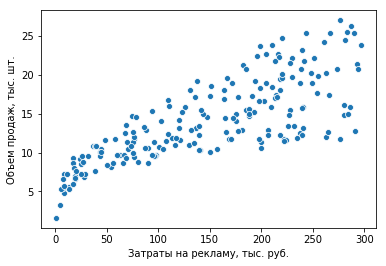

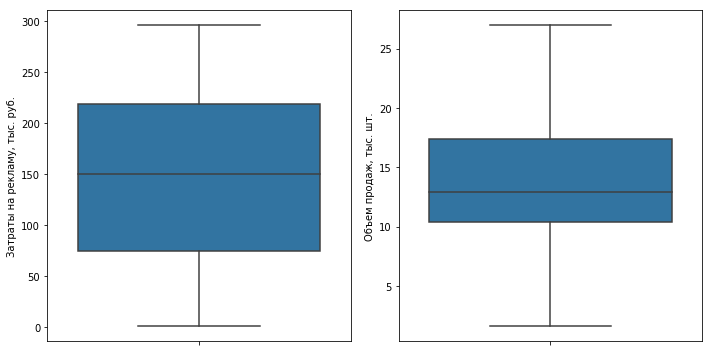

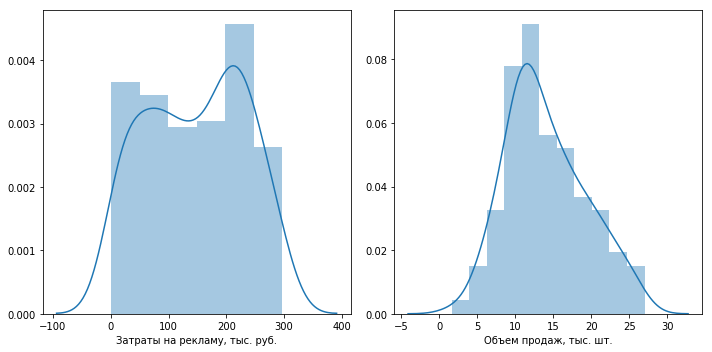

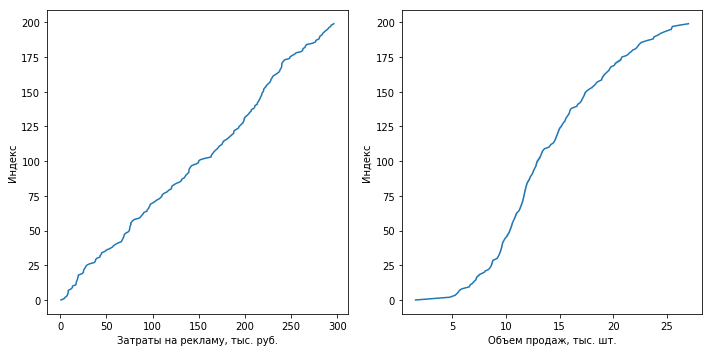

In [7]:
plot(df)

### Проверим на нормальность распределения

In [8]:
a = 0.05
print('alpha = ', a )
_, p = stats.normaltest(df.iloc[:, 0])
if p < a:
    print('Затраты на рекламу имеют нормальное распределение. p_value =', round(p,3))
else:
    print('Затраты на рекламу имеют  НЕнормальное распределение. p_value =', round(p,3))
_, p = stats.normaltest(df.iloc[:, 1])
if p < a:
    print('Объем продаж имеет нормальное распределение. p_value =', round(p, 3))
else:
    print('Объем продаж имеет НЕнормальное распределение. p_value =', round(p, 3))

alpha =  0.05
Затраты на рекламу имеют нормальное распределение. p_value = 0.0
Объем продаж имеет нормальное распределение. p_value = 0.025


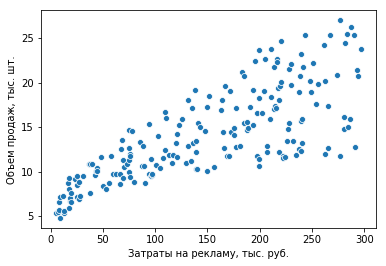

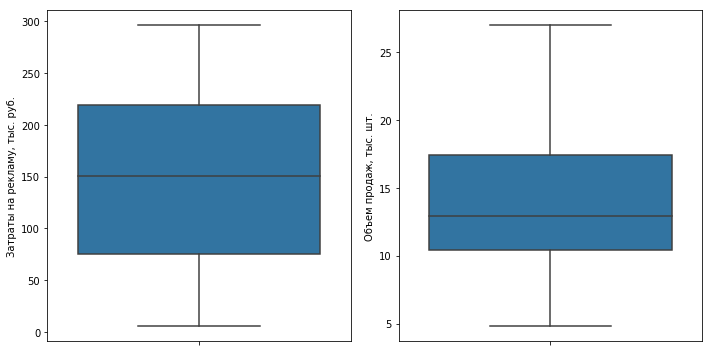

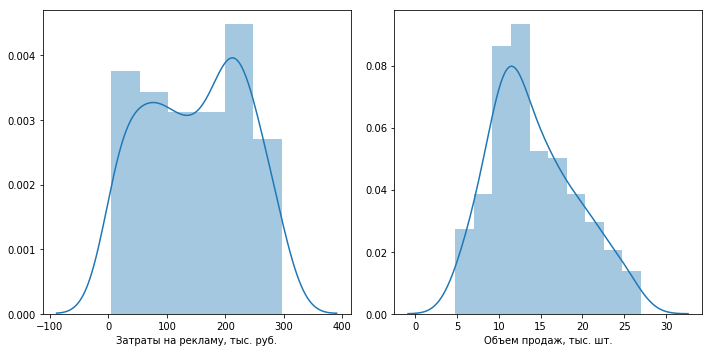

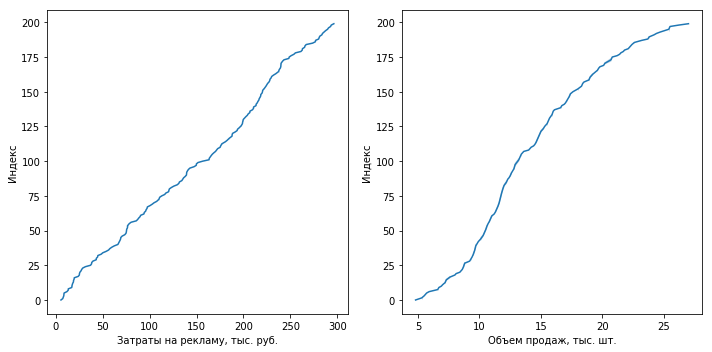

In [9]:
df2 = df.sort_values(by='Затраты на рекламу, тыс. руб.')
df2 = df2[2:]
plot(df2)

### При построении модели, будем ориентироваться на 2 основных показателя: R2 и MAPE (mean absolute percentage error)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0], df.iloc[:,1], test_size=0.2, random_state=42)
X_train = np.array(X_train).reshape((-1, 1))
y_train = np.array(y_train)
X_test = np.array(X_test).reshape((-1, 1))
y_test = np.array(y_test)
print('Для того, чтобы убедиться, что модель не переобучена, разобьем сначала выборку на 2 части и назовем их Трейн и Тест')
print('train size =', len(X_train), 'объектов')
print('test size =', len(X_test), 'объектов')

Для того, чтобы убедиться, что модель не переобучена, разобьем сначала выборку на 2 части и назовем их Трейн и Тест
train size = 160 объектов
test size = 40 объектов


Попробуем 2 метода построения модели.
1) Данные как есть ( тк они имеют норальное распределение и всего 1 регрессор)
2) прологорифмируем данные

________ nothing ________
R^2 train: 0.5911667812043271
R^2 train: 0.6766954295627076
mape train 21.079487354481515
mape test 18.668746313592116
intercept = 7.119638430592957 coeficient = [0.04652973]


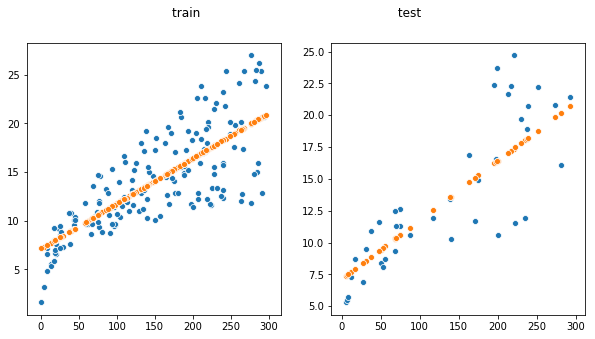



________ log ________
R^2 train: 0.7412777026398351
R^2 train: 0.7407155071851168
mape train 7.260195474942095
mape test 7.518902953824701
intercept = 0.8663755213240307 coeficient = [0.36183834]


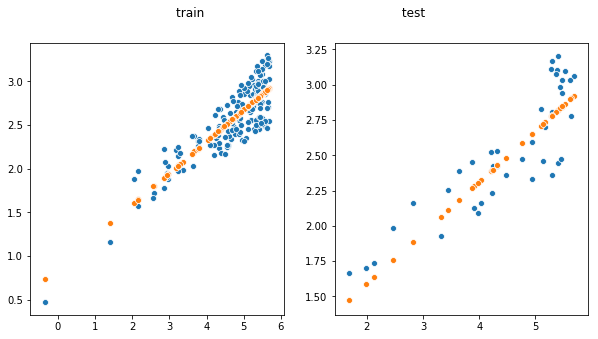



________ std ________
R^2 train: 0.5911667812043271
R^2 train: 0.6766954295627077
mape train 21.079487354481515
mape test 18.668746313592113
intercept = 14.100000000000001 coeficient = [3.91569271]


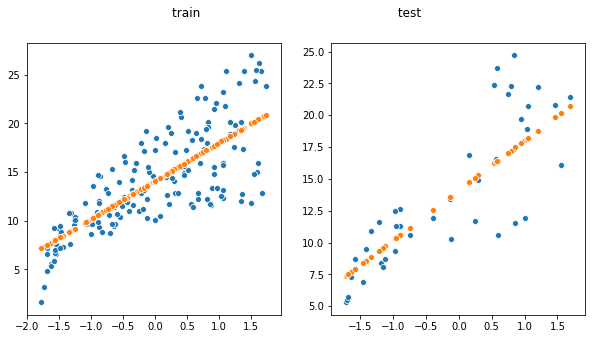



________ std_log ________
R^2 train: 0.5876903252342542
R^2 train: 0.7157401682763197
mape train 9.589606479891977
mape test 7.701971226451312
intercept = 2.572227344092206 coeficient = [0.31424176]


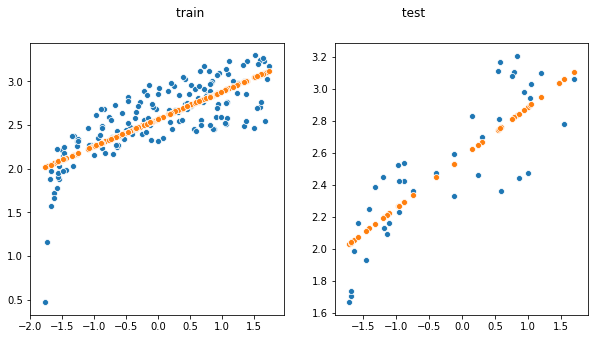

In [11]:
for i in ['nothing', 'log', 'std', 'std_log']:
    print('________', i, '________')
    dfs, _ = log_or_standard_scaler(X_train, X_test, y_train, y_test, mod=i)
    lr, lr.intercept_, lr.coef_, y_train_pred, y_test_pred = fit(dfs)
    plot_res(dfs, y_train_pred, y_test_pred)
    print('\n')

R^2 - коэфициент детерминации = 0.74
Коэфициент корреляции = 0.86
t критерий по данным =  23.73
t критерий по Стьюденту =  1.65
F статистика коэфициента детерминации=  281.7692307692307
F критерий фишера по таблице 3,84 

                    Коэфициент  Стандартная ошибка  t критерий  P_value
Intercept                0.905               0.071      12.737      0.0
Затраты на рекламу       0.355               0.015      23.871      0.0


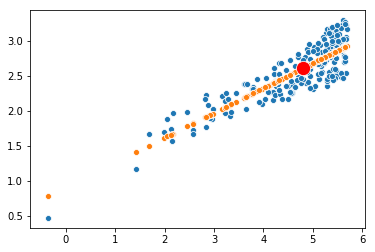

In [12]:
X, Y = np.log(np.array(df.iloc[:,0]).reshape((-1, 1))), np.log(np.array(df.iloc[:,1]))
lr = LinearRegression().fit(X, Y) 
Y_pred = lr.predict(X)
to_predict = np.log(121)
predicted_value_log = lr.predict(to_predict)
final_predicted_value = float(np.exp(predicted_value_log))
intercept = round(lr.intercept_,3)
coef = round(float(lr.coef_),3)
corr = round(np.corrcoef(X.flatten(), Y)[0][1],2)
r2= round(lr.score(X, Y),2)
t =  corr * sqrt(len(X) - 2) / sqrt(1 - r2)
t_criteria = sts.t.ppf(0.95,len(X))
F_stat = r2/(1-r2)*((len(X)-2)/2)
print('R^2 - коэфициент детерминации =', r2)
print('Коэфициент корреляции =', corr)
print('t критерий по данным = ', round(t, 2))
print('t критерий по Стьюденту = ', round(t_criteria, 2))
print('F статистика коэфициента детерминации= ', F_stat)
print('F критерий фишера по таблице 3,84 \n')
model_summary(lr, X, Y, columns=['Затраты на рекламу'])
sns.scatterplot(x=X.flatten(), y=Y)
sns.scatterplot(x=X.flatten(), y=Y_pred)
sns.scatterplot(x=to_predict, y=lr.predict(to_predict), color='red', s=200 );

In [13]:
print('Уравнение линейной регресии будет вида:')
print('Объем продаж =',intercept, '+ Затраты на рекламу *',coef)
print('При расходах на рекламу 121тыс. Объем продаж составит', round(final_predicted_value,2), 'тыс. шт')

Уравнение линейной регресии будет вида:
Объем продаж = 0.905 + Затраты на рекламу * 0.355
При расходах на рекламу 121тыс. Объем продаж составит 13.57 тыс. шт


Высокий коэфициент детерминации = 0.74 обозначает, что в 74% случаев изменения X приводят к изменению Y
Высокий коэфициент корреляции = 0.86 обозначет, что действительно X и Y связаны
Для предсказния необходимо:  Затраты на рекламу прологорифмировать, а у полученного Объема продаж взять экспоненту
Так как t по данным > t критерия , то отклоняем гипотезу о равенстве 0 коэффициента корреляции
Поскольку фактическое значение F > Fkp, то коэффициент детерминации статистически значим 
Найденная оценка уравнения регрессии статистически надежна